In [1]:
import pandas as pd

nb_hrs_studies = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
avg_grade = [5.5, 5.8, 6.8, 7.2, 7.4, 7.8, 8.2, 8.8, 9.3, 9.4]
data = pd.DataFrame({"nb_hrs_studies": nb_hrs_studies, "avg_grade": avg_grade})
data

,nb_hrs_studies,avg_grade
0,1,5.5
1,2,5.8
2,3,6.8
3,4,7.2
4,5,7.4
5,6,7.8
6,7,8.2
7,8,8.8
8,9,9.3
9,10,9.4


Text(0, 0.5, 'avg_grades')

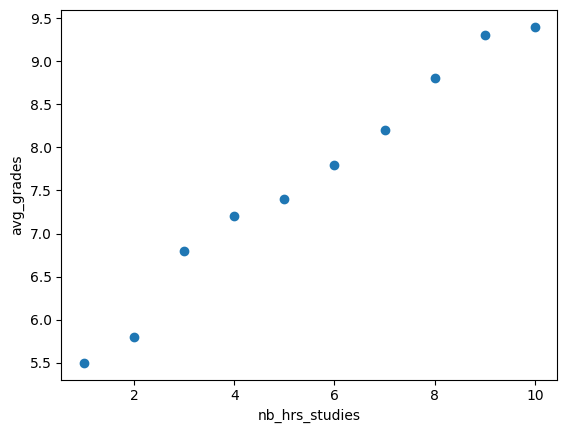

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data["nb_hrs_studies"], data["avg_grade"])
plt.xlabel("nb_hrs_studies")
plt.ylabel("avg_grades")

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=5, n_informative=5, noise=100)

In [4]:
pd.DataFrame(X).describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.016045,-0.043577,-0.024735,0.008988,-0.032088
std,1.001024,0.993177,0.998003,1.010724,1.013446
min,-3.404577,-2.766148,-2.970074,-2.980311,-3.643310
25%,-0.644489,-0.734559,-0.715610,-0.662423,-0.697372
50%,-0.014173,-0.081537,-0.024283,0.010107,-0.035349
75%,0.679588,0.624753,0.653864,0.728950,0.651683
max,3.446256,3.419906,3.221185,2.994393,3.059902


<Axes: >

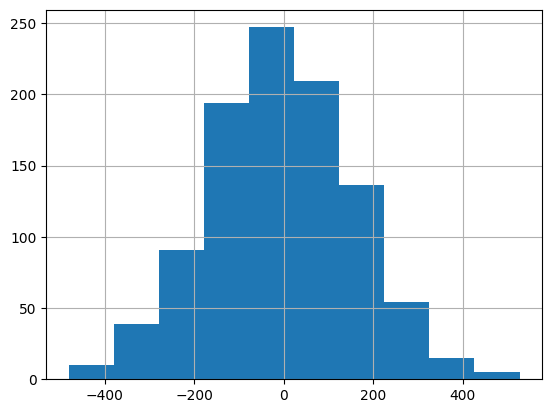

In [5]:
pd.Series(y).hist()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [7]:
from river.linear_model import LinearRegression

model = LinearRegression()

In [8]:
# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    model.learn_one(x_json, y_i)

In [9]:
# predict on the test set
import pandas as pd

preds = []
for x_i in X_test:
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    preds.append(model.predict_one(x_json))

In [10]:
# compute accuracy
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.6336221934758604

In [11]:
from river.tree import HoeffdingAdaptiveTreeRegressor

model = HoeffdingAdaptiveTreeRegressor(seed=42)

# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    model.learn_one(x_json, y_i)

# predict on the test set
import pandas as pd

preds = []
for x_i in X_test:
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    preds.append(model.predict_one(x_json))

# compute accuracy
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.578989853096765

In [12]:
def evaluate_HATR(grace_period, leaf_prediction, model_selector_decay):
    # model pipeline
    model = HoeffdingAdaptiveTreeRegressor(
        grace_period=grace_period,
        leaf_prediction=leaf_prediction,
        model_selector_decay=model_selector_decay,
        seed=42,
    )

    # fit the model
    for x_i, y_i in zip(X_train, y_train):
        x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
        model.learn_one(x_json, y_i)

    # predict on the test set
    preds = []
    for x_i in X_test:
        x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
        preds.append(model.predict_one(x_json))

    # compute accuracy
    return r2_score(y_test, preds)

In [13]:
grace_periods = [
    0,
    5,
    10,
]
leaf_predictions = ["mean", "adaptive"]
model_selector_decays = [0.3, 0.8, 0.95]

In [14]:
results = []
i = 0
for grace_period in grace_periods:
    for leaf_prediction in leaf_predictions:
        for model_selector_decay in model_selector_decays:
            print(i)
            i = i + 1
            results.append(
                [
                    grace_period,
                    leaf_prediction,
                    model_selector_decay,
                    evaluate_HATR(grace_period, leaf_prediction, model_selector_decay),
                ]
            )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [15]:
pd.DataFrame(
    results,
    columns=["grace_period", "leaf_prediction", "model_selector_decay", "r2_score"],
).sort_values("r2_score", ascending=False)

,grace_period,leaf_prediction,model_selector_decay,r2_score
10,5,adaptive,0.80,0.606804
11,5,adaptive,0.95,0.606804
17,10,adaptive,0.95,0.601098
16,10,adaptive,0.80,0.594324
9,5,adaptive,0.30,0.561409
5,0,adaptive,0.95,0.556685
15,10,adaptive,0.30,0.542426
4,0,adaptive,0.80,0.525855
3,0,adaptive,0.30,0.484801
12,10,mean,0.30,0.306106


In [16]:
from river.tree import SGTRegressor

# model pipeline
model = SGTRegressor()

# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    model.learn_one(x_json, y_i)

# predict on the test set
preds = []
for x_i in X_test:
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    preds.append(model.predict_one(x_json))

# compute accuracy
r2_score(y_test, preds)

0.23372371113596724

In [17]:
from river.tree import SGTRegressor


def evaluate_SGT(delta, lambda_value, grace_period):
    # model pipeline
    model = SGTRegressor(
        delta=delta,
        lambda_value=lambda_value,
        grace_period=grace_period,
    )

    # fit the model
    for x_i, y_i in zip(X_train, y_train):
        x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
        model.learn_one(x_json, y_i)

    # predict on the test set
    preds = []
    for x_i in X_test:
        x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
        preds.append(model.predict_one(x_json))

    # compute accuracy
    return r2_score(y_test, preds)

In [18]:
grace_periods = [0, 10, 25]
lambda_values = [0.5, 0.8, 1.0]
deltas = [0.0001, 0.001, 0.01, 0.1]

In [19]:
results = []
i = 0
for grace_period in grace_periods:
    for lambda_value in lambda_values:
        for delta in deltas:
            print(i)
            i = i + 1
            result = evaluate_SGT(delta, lambda_value, grace_period)
            print(result)
            results.append([delta, lambda_value, grace_period, result])

0
0.28838374591731075
1
0.2488805967656167
2
0.2700573405179396
3
0.1736894180514975
4
0.2758363043906831
5
0.33118816279864016
6
0.3843678866792335
7
0.2710115573247417
8
0.270800670957154
9
0.3363595890171366
10
0.34273483119058534
11
0.2926970684777285
12
0.25119121799592725
13
0.27952253235378943
14
0.33028821014711474
15
0.34397531471235787
16
0.24708095855749035
17
0.29470582545081636
18
0.3973547226568238
19
0.3828264392896362
20
0.24458991435961852
21
0.2818436935174117
22
0.377058118185462
23
0.37043956916435494
24
0.2588006766379223
25
0.28875712216701144
26
0.35231642418484965
27
0.4087663819049878
28
0.269294904773986
29
0.30339526796716454
30
0.37533955496219384
31
0.4088241293913506
32
0.2648424893903151
33
0.2975467329748235
34
0.3593132708774345
35
0.3978021245045925


In [20]:
pd.DataFrame(
    results, columns=["delta", "lambda_value", "grace_period", "r2_score"]
).sort_values("r2_score", ascending=False)

,delta,lambda_value,grace_period,r2_score
31,0.1000,0.8,25,0.408824
27,0.1000,0.5,25,0.408766
35,0.1000,1.0,25,0.397802
18,0.0100,0.8,10,0.397355
6,0.0100,0.8,0,0.384368
19,0.1000,0.8,10,0.382826
22,0.0100,1.0,10,0.377058
30,0.0100,0.8,25,0.375340
23,0.1000,1.0,10,0.370440
34,0.0100,1.0,25,0.359313


In [21]:
from river.ensemble import SRPRegressor

# model pipeline
base_model = LinearRegression()
model = SRPRegressor(model=base_model, n_models=3, seed=42)

# fit the model
for x_i, y_i in zip(X_train, y_train):
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    model.learn_one(x_json, y_i)

# predict on the test set
preds = []
for x_i in X_test:
    x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
    preds.append(model.predict_one(x_json))

# compute accuracy
r2_score(y_test, preds)

0.34702457108191687

In [22]:
def evaluate_SRP(n_models):
    # model pipeline
    base_model = LinearRegression()
    model = SRPRegressor(model=base_model, n_models=n_models, seed=42)

    # fit the model
    for x_i, y_i in zip(X_train, y_train):
        x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
        model.learn_one(x_json, y_i)

    # predict on the test set
    preds = []
    for x_i in X_test:
        x_json = {"val" + str(i): x for i, x in enumerate(x_i)}
        preds.append(model.predict_one(x_json))

    # compute accuracy
    return r2_score(y_test, preds)

In [23]:
results = []
for n_models in range(1, 50):
    results.append([n_models, evaluate_SRP(n_models)])

In [24]:
pd.DataFrame(results, columns=["n_models", "r2_score"]).sort_values(
    "r2_score", ascending=False
)

,n_models,r2_score
8,9,0.528700
29,30,0.527998
30,31,0.522123
45,46,0.521832
38,39,0.521726
47,48,0.520505
40,41,0.520290
37,38,0.518359
25,26,0.518282
22,23,0.516621
